# Моделирование информационных потоков

In [831]:
import requests
import pandas as pd
from datetime import datetime
import time
import math 
import matplotlib.dates as mdates
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
id_group = 'spbu_advert'                                                              
                                                           
count_posts = 100000                                                          



In [36]:
offset = 0      
count = 100       
data_posts = []

while offset < count_posts:

    url = 'https://api.vk.com/method/wall.get'
    params = {
        'domain': id_group,
        'filter': 'all',                                      
        'count': count,
        'offset': offset,
        'access_token': token,
        'v': 5.73
    }
    
    r = requests.get(url, params = params).json()
    
    check = True
    if check:
        real_count = r['response']['count']
        if real_count < count_posts:
            count_posts = real_count
            check = False
        else:
            check = False
    
    data_posts += r['response']['items'] 
    offset += count    
    time.sleep(0.5)

In [ ]:
#продам@spbu_advert
#учеба@spbu_advert
#пунк@spbu_advert
#вунк@spbu_advert
#пропуск@spbu_advert

#мертвая_душа@spbu_advert
#пропуск@spbu_advert
#соседи@spbu_advert
#учеба@spbu_advert
#услуги@spbu_advert
#перевозки@spbu_advert
#мероприятия@spbu_advert
#мебель@spbu_advert
#печать@spbu_advert
#бск@spbu_advert
#книги@spbu_advert
#еда@spbu_advert
#косметика@spbu_advert
#холодильник@spbu_advert
#техника@spbu_advert
#потеря@spbu_advert
#находка@spbu_advert
#обмен@spbu_advert
#продам@spbu_advert
#куплю@spbu_advert
#отдам@spbu_advert
#ищу@spbu_advert
#вопрос@spbu_advert
#жилье@spbu_advert
#животные@spbu_advert
#просьба@spbu_advert
#приму@spbu_advert
#работа@spbu_advert
#аренда@spbu_advert
#опрос@spbu_advert

In [779]:


stats_1 = []
stats_2 = []
hashtag_1 = '#пропуск@spbu_advert'
hashtag_2 = '#мертвая_душа@spbu_advert' 
for record in data_posts:   
    title = record['text']           
    if title.find(hashtag_1) == -1 & title.find(hashtag_2) == -1:
        continue 
    if title.find(hashtag_1) != -1:
        title = hashtag_1
    else:
        title = hashtag_2
       
    
    year = datetime.fromtimestamp(record['date']).strftime('%Y') 
    month = datetime.fromtimestamp(record['date']).strftime('%Y.%m') 
    day = datetime.fromtimestamp(record['date']).strftime('%Y.%m.%d') 
    hour = datetime.fromtimestamp(record['date']).strftime('%H')                         
        
    
       if title == hashtag_2:
        stats_2.append([title , year, month, day, hour])
    else:
        stats_1.append([title , year, month, day, hour])


#Создаем DataFrame (таблицу) из данных и записываем
columns = ["hashtag", "year","month", 'day', "hour"] #задаем заголовки таблицы
df_1 = pd.DataFrame(data=stats_1, columns=columns)
df_2 = pd.DataFrame(data=stats_2, columns=columns)

In [780]:
#группировка таблиц по часам и удаление не нужных столбцов
df_year_1 = df_1.drop(['hour', 'month', 'day'], axis=1)
df_group_by_year_1 = df_year_1.groupby('year').sum()                                                          
df_group_by_year_1['count_post'] = df_year_1.groupby('year')['hashtag'].count()                             
         
df_month_1 = df_1.drop(['hour', 'day', "year"], axis=1)  
df_group_by_month_1 = df_month_1.groupby('month').sum()                                              
df_group_by_month_1['count_post'] = df_month_1.groupby('month')['hashtag'].count() 


df_day_1 = df_1.drop(['hour', 'month', "year"], axis=1)
df_group_by_day_1 = df_day_1.groupby('day').sum()                                                         
df_group_by_day_1['count_post'] = df_day_1.groupby('day')['hashtag'].count() 

df_group_by_month_1

,hashtag,count_post
month,,
2015.06,#пропуск@spbu_advert#пропуск@spbu_advert#пропу...,8
2015.07,#пропуск@spbu_advert#пропуск@spbu_advert#пропу...,28
2015.08,#пропуск@spbu_advert#пропуск@spbu_advert#пропу...,10
2015.09,#пропуск@spbu_advert#пропуск@spbu_advert#пропу...,8
2015.10,#пропуск@spbu_advert#пропуск@spbu_advert#пропу...,8
...,...,...
2020.07,#пропуск@spbu_advert#пропуск@spbu_advert#пропу...,33
2020.08,#пропуск@spbu_advert#пропуск@spbu_advert#пропу...,43
2020.09,#пропуск@spbu_advert#пропуск@spbu_advert#пропу...,71


In [781]:
df_year_1_old = df_group_by_year_1.loc[(df_group_by_year_1.index.get_level_values(level='year') >='2015') & (df_group_by_year_1.index.get_level_values(level='year') <='2019')].mean(level='year')
df_month_1_old = df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01') & (df_group_by_month_1.index.get_level_values(level='month') <='2020.09')].mean(level='month')
df_year_1_new = df_group_by_year_1.loc[(df_group_by_year_1.index.get_level_values(level='year') >'2019')].mean(level='year')
df_month_1_new = df_group_by_month_1.loc[ (df_group_by_month_1.index.get_level_values(level='month') >'2020.09')].mean(level='month')




In [782]:
df_year_2 = df_2.drop(['hour', 'month', 'day'], axis=1)
df_group_by_year_2 = df_year_2.groupby('year').sum()                                                          
df_group_by_year_2['count_post'] = df_year_2.groupby('year')['hashtag'].count()                             
         
df_month_2 = df_2.drop(['hour', 'day', "year"], axis=1)  
df_group_by_month_2 = df_month_2.groupby('month').sum()                                              
df_group_by_month_2['count_post'] = df_month_2.groupby('month')['hashtag'].count() 


df_day_2 = df_2.drop(['hour', 'month', "year"], axis=1)
df_group_by_day_2 = df_day_2.groupby('day').sum()                                                         
df_group_by_day_2['count_post'] = df_day_2.groupby('day')['hashtag'].count() 

In [783]:
df_year_2_old = df_group_by_year_2.loc[(df_group_by_year_2.index.get_level_values(level='year') >='2015') & (df_group_by_year_2.index.get_level_values(level='year') <='2019')].mean(level='year')
df_month_2_old = df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01') & (df_group_by_month_2.index.get_level_values(level='month') <='2020.09')].mean(level='month')
df_year_2_new = df_group_by_year_2.loc[(df_group_by_year_2.index.get_level_values(level='year') >'2019')].mean(level='year')
df_month_2_new = df_group_by_month_2.loc[ (df_group_by_month_2.index.get_level_values(level='month') >'2020.09')].mean(level='month')



# Линейная модель


$y(t)=y(t_0)+v(t-t_0)$

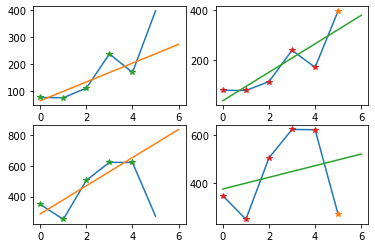

In [786]:
def y(x, a, b):
    return a*x +b

xx = np.linspace(0, 6, 1000)

lr_year_1_old= LinearRegression()
lr_year_1_old.fit(df_year_1_old.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_year_1_old.mean(level='year').count_post)

lr_year_1_new= LinearRegression()
lr_year_1_new.fit(df_group_by_year_1.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_1.mean(level='year').count_post)

plt.subplot(221)
plt.plot(df_group_by_year_1.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_1.mean(level='year').count_post)
plt.plot(xx, y(xx,lr_year_1_old.coef_, lr_year_1_old.intercept_))
plt.plot(df_year_1_old.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_year_1_old.mean(level='year').count_post, '*')

plt.subplot(222)
plt.plot(df_group_by_year_1.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_1.mean(level='year').count_post)
plt.plot(df_year_1_new.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_year_1_new.mean(level='year').count_post, '*')
plt.plot(xx, y(xx,lr_year_1_new.coef_, lr_year_1_new.intercept_))     
plt.plot(df_year_1_old.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_year_1_old.mean(level='year').count_post, '*')

##########################
lr_year_2_old= LinearRegression()
lr_year_2_old.fit(df_year_2_old.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_year_2_old.mean(level='year').count_post)

lr_year_2_new= LinearRegression()
lr_year_2_new.fit(df_group_by_year_2.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_2.mean(level='year').count_post)

plt.subplot(223)
plt.plot(df_group_by_year_2.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_2.mean(level='year').count_post)
plt.plot(xx, y(xx,lr_year_2_old.coef_, lr_year_2_old.intercept_))
plt.plot(df_year_2_old.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_year_2_old.mean(level='year').count_post, '*')

plt.subplot(224)
plt.plot(df_group_by_year_2.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_2.mean(level='year').count_post)
plt.plot(df_year_2_new.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_year_2_new.mean(level='year').count_post, '*')
plt.plot(xx, y(xx,lr_year_2_new.coef_, lr_year_2_new.intercept_))     
plt.plot(df_year_2_old.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_year_2_old.mean(level='year').count_post, '*')



In [805]:
print('Линейная модель для первого хаштега:')
print('v = ', lr_year_1_old.coef_[0], ', y_0 = ', lr_year_1_old.intercept_)
print('v = ', lr_year_1_new.coef_[0], ', y_0 = ', lr_year_1_new.intercept_)
print('Линейная модель для второго хаштега:')
print('v = ', lr_year_2_old.coef_[0], ', y_0 = ', lr_year_2_old.intercept_)
print('v = ', lr_year_2_new.coef_[0], ', y_0 = ', lr_year_2_new.intercept_)

Линейная модель для первого хаштега:
v =  34.900000000000006 , y_0 =  64.0
v =  57.68571428571429 , y_0 =  33.61904761904762
Линейная модель для второго хаштега:
v =  91.39999999999999 , y_0 =  287.0
v =  23.971428571428568 , y_0 =  376.9047619047619


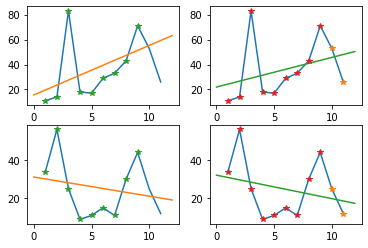

In [788]:
xx = np.linspace(0, 12, 1000)

lr_month_1_old= LinearRegression()
lr_month_1_old.fit(df_month_1_old.mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000, df_month_1_old.mean(level='month').count_post)

lr_month_1_new= LinearRegression()
lr_month_1_new.fit(df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000,df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)

plt.subplot(221)
plt.plot(df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000,df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)
plt.plot(xx, y(xx,lr_month_1_old.coef_, lr_month_1_old.intercept_))
plt.plot(df_month_1_old.mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000, df_month_1_old.mean(level='month').count_post, '*')

plt.subplot(222)
plt.plot(df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000,df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)

plt.plot(df_month_1_new.mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000, df_month_1_new.mean(level='month').count_post, '*')
plt.plot(xx, y(xx,lr_month_1_new.coef_, lr_month_1_new.intercept_))     
plt.plot(df_month_1_old.mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000, df_month_1_old.mean(level='month').count_post, '*')

##############################################

lr_month_2_old= LinearRegression()
lr_month_2_old.fit(df_month_2_old.mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000, df_month_2_old.mean(level='month').count_post)

lr_month_2_new= LinearRegression()
lr_month_2_new.fit(df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000,df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)

plt.subplot(223)
plt.plot(df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000,df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)
plt.plot(xx, y(xx,lr_month_2_old.coef_, lr_month_2_old.intercept_))
plt.plot(df_month_2_old.mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000, df_month_2_old.mean(level='month').count_post, '*')

plt.subplot(224)
plt.plot(df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000,df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)

plt.plot(df_month_2_new.mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000, df_month_2_new.mean(level='month').count_post, '*')
plt.plot(xx, y(xx,lr_month_2_new.coef_, lr_month_2_new.intercept_))     
plt.plot(df_month_2_old.mean(level='month').index.values.astype('float').reshape(-1, 1)*100-202000, df_month_2_old.mean(level='month').count_post, '*')


In [806]:
print('Линейная модель для первого хаштега:')
print('v = ', lr_month_1_old.coef_[0], ', y_0 = ', lr_month_1_old.intercept_)
print('v = ', lr_month_1_new.coef_[0], ', y_0 = ', lr_month_1_new.intercept_)
print('Линейная модель для второго хаштега:')
print('v = ', lr_month_2_old.coef_[0], ', y_0 = ', lr_month_2_old.intercept_)
print('v = ', lr_month_2_new.coef_[0], ', y_0 = ', lr_month_2_new.intercept_)

Линейная модель для первого хаштега:
v =  3.966666666666667 , y_0 =  15.611111111111107
v =  2.372727272727273 , y_0 =  21.94545454545454
Линейная модель для второго хаштега:
v =  -1.0000000000000007 , y_0 =  31.111111111111114
v =  -1.2272727272727277 , y_0 =  32.09090909090909


# Экспоненциальная модель

$ y(t) =y(t_0)e^{\lambda(t-t_0)}$

[78.47574757  0.24117011  1.          1.        ]
[3.08409395e+02 1.92572464e-01 1.00000000e+00 1.00000000e+00]
[57.20337424  0.37220552  1.          1.        ]
[3.88943750e+02 4.54924174e-02 1.00000000e+00 1.00000000e+00]


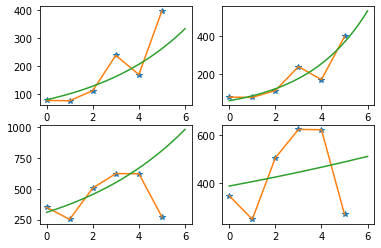

In [751]:
%matplotlib inline

x = df_year_1_old.mean(level='year').index.values.astype('float')-2015
y = df_year_1_old['count_post'].values
x0 = float(df_year_1_old.mean(level='year').idxmax().count_post)-2015
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+3], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'dogbox', maxfev=20000 )
print(p)
xx = np.linspace(0, float(df_year_1_old.mean(level='year').index.values[-1])-2015+2, 1000)
plt.subplot(221)
plt.plot(df_group_by_year_1.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_1.mean(level='year').count_post, '*')

plt.plot(df_group_by_year_1.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_1.mean(level='year').count_post)

plt.plot(xx, piecewise_linear(xx, *p))

############################

x = df_year_2_old.mean(level='year').index.values.astype('float')-2015
y = df_year_2_old['count_post'].values
x0 = float(df_year_2_old.mean(level='year').idxmax().count_post)-2015
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+3], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'dogbox', maxfev=20000 )

print(p)

xx = np.linspace(0, float(df_year_2_old.mean(level='year').index.values[-1])-2015+2, 1000)
plt.subplot(223)
plt.plot(df_group_by_year_2.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_2.mean(level='year').count_post, '*')

plt.plot(df_group_by_year_2.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_2.mean(level='year').count_post)

plt.plot(xx, piecewise_linear(xx, *p))

#################

x = df_group_by_year_1.mean(level='year').index.values.astype('float')-2015
y = df_group_by_year_1['count_post'].values
x0 = float(df_group_by_year_1.mean(level='year').idxmax().count_post)-2015
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+3], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'dogbox', maxfev=20000 )
print(p)
xx = np.linspace(0, float(df_group_by_year_1.mean(level='year').index.values[-1])-2015+1, 1000)
plt.subplot(222)
plt.plot(df_group_by_year_1.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_1.mean(level='year').count_post, '*')

plt.plot(df_group_by_year_1.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_1.mean(level='year').count_post)

plt.plot(xx, piecewise_linear(xx, *p))

############################

x = df_group_by_year_2.mean(level='year').index.values.astype('float')-2015
y = df_group_by_year_2['count_post'].values
x0 = float(df_group_by_year_2.mean(level='year').idxmax().count_post)-2015
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+3], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'dogbox', maxfev=20000 )

print(p)

xx = np.linspace(0, float(df_group_by_year_2.mean(level='year').index.values[-1])-2015+1, 1000)
plt.subplot(224)
plt.plot(df_group_by_year_2.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_2.mean(level='year').count_post, '*')
plt.plot(df_group_by_year_2.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_2.mean(level='year').count_post)

plt.plot(xx, piecewise_linear(xx, *p))

[57.20337424  0.37220552  1.          1.        ]
[ 2.74205062e+02  2.70979405e-01  1.68726145e+04 -8.25529016e-01]


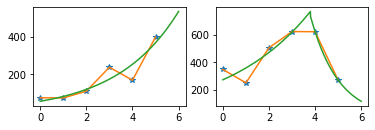

In [757]:

#################

x = df_group_by_year_1.mean(level='year').index.values.astype('float')-2015
y = df_group_by_year_1['count_post'].values
x0 = float(df_group_by_year_1.mean(level='year').idxmax().count_post)-2015
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+2], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'dogbox', maxfev=20000 )
print(p)
xx = np.linspace(0, float(df_group_by_year_1.mean(level='year').index.values[-1])-2015+1, 1000)
plt.subplot(221)
plt.plot(df_group_by_year_1.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_1.mean(level='year').count_post, '*')

plt.plot(df_group_by_year_1.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_1.mean(level='year').count_post)

plt.plot(xx, piecewise_linear(xx, *p))

############################

x = df_group_by_year_2.mean(level='year').index.values.astype('float')-2015
y = df_group_by_year_2['count_post'].values
x0 = float(df_group_by_year_2.mean(level='year').idxmax().count_post)-2015
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+0.8], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'dogbox', maxfev=20000 )

print(p)

xx = np.linspace(0, float(df_group_by_year_2.mean(level='year').index.values[-1])-2015+1, 1000)
plt.subplot(222)
plt.plot(df_group_by_year_2.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_2.mean(level='year').count_post, '*')
plt.plot(df_group_by_year_2.mean(level='year').index.values.astype('float').reshape(-1, 1)-2015, df_group_by_year_2.mean(level='year').count_post)

plt.plot(xx, piecewise_linear(xx, *p))

[17.58109248  0.12817481  1.          1.        ]
[35.05521423 -0.06247901  1.          1.        ]
[24.8016123   0.06021879  1.          1.        ]
[35.16771613 -0.06261588  1.          1.        ]


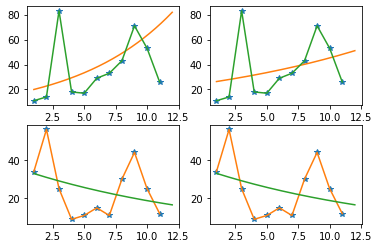

In [800]:
%matplotlib inline

x = (df_month_1_old.mean(level='month').index.values.astype('float')-2020)*100
y = df_month_1_old['count_post'].values
x0 = (float(df_month_1_old.mean(level='month').idxmax().count_post)-2020)*100
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+20], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'trf', maxfev=20000 )

print(p)

xx = np.linspace(1, (float(df_month_1_old.mean(level='month').index.values[-1])-2020)*100+3, 1000)

plt.subplot(221)
plt.plot((df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)-2020)*100,df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post, '*')

plt.plot(xx, piecewise_linear(xx, *p))
plt.plot((df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)-2020)*100,df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)

##########


x = (df_month_2_old.mean(level='month').index.values.astype('float')-2020)*100
y = df_month_2_old['count_post'].values
x0 = (float(df_month_2_old.mean(level='month').idxmax().count_post)-2020)*100
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+20], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'trf', maxfev=20000 )

print(p)

xx = np.linspace(1, (float(df_month_2_old.mean(level='month').index.values[-1])-2020)*100+3, 1000)

plt.subplot(223)
plt.plot((df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)-2020)*100,df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post, '*')

plt.plot((df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)-2020)*100,df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)

plt.plot(xx, piecewise_linear(xx, *p))

########################3

x = (df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float')-2020)*100
y = df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')]['count_post'].values
x0 = (float(df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').idxmax().count_post)-2020)*100
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+20], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'trf', maxfev=20000 )

print(p)

xx = np.linspace(1, (float(df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values[-1])-2020)*100+1, 1000)

plt.subplot(222)
plt.plot((df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)-2020)*100,df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post, '*')

plt.plot(xx, piecewise_linear(xx, *p))
plt.plot((df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)-2020)*100,df_group_by_month_1.loc[(df_group_by_month_1.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)

##########


x = (df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float')-2020)*100
y = df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')]['count_post'].values
x0 = (float(df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').idxmax().count_post)-2020)*100
def piecewise_linear(x, a_1, b_1, a_2, b_2):
    return np.piecewise(x, [x <= x0+20], [lambda x:a_1*np.exp(b_1*x), lambda x:a_2*np.exp(b_2*x)])

p , e = optimize.curve_fit(piecewise_linear, x, y,method= 'trf', maxfev=20000 )

print(p)

xx = np.linspace(1, (float(df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values[-1])-2020)*100+1, 1000)

plt.subplot(224)
plt.plot((df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)-2020)*100,df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post, '*')

plt.plot((df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').index.values.astype('float').reshape(-1, 1)-2020)*100,df_group_by_month_2.loc[(df_group_by_month_2.index.get_level_values(level='month') >='2020.01')].mean(level='month').count_post)

plt.plot(xx, piecewise_linear(xx, *p))
